In [3]:
import pandas as pd

# List of dates and event names
events = [
    ("1991-01-17", "Operation Desert Storm"),
    ("2001-10-07", "Operation Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Operation Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]

# Create DataFrame
df_events = pd.DataFrame(events, columns=["date", "event"])
df_events["date"] = pd.to_datetime(df_attacks["date"])

df_events


,date,event
0,1991-01-17,Operation Desert Storm
1,2001-10-07,Operation Enduring Freedom
2,2003-03-20,Invasion of Iraq
3,2011-03-19,Libya Intervention
4,2014-08-08,Operation Inherent Resolve
5,2017-04-07,Syria Airstrike
6,2020-01-03,Soleimani Strike


In [11]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay

# 1) Your events
events = [
    ("1991-01-17", "Desert Storm"),
    ("2001-10-07", "Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]
df = pd.DataFrame(events, columns=["date","event"])
df["date"]    = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.day_name()
df["next_bd"] = df["date"] + BDay(1)

# 2) Fetch window
start = df["date"].min() - pd.Timedelta(days=5)
end   = df["date"].max() + pd.Timedelta(days=5)

# 3) Helper: fetch a ticker’s pct-return series
def fetch_returns(ticker: str) -> pd.Series:
    s = (
        yf.Ticker(ticker)
          .history(start=start, end=end, auto_adjust=True)["Close"]
          .tz_localize(None)
          .sort_index()
    )
    return s.pct_change()

# 4) Build each return series
rets = {
    "SP500":  fetch_returns("^GSPC"),
    "MSFT":   fetch_returns("MSFT"),
    "NASDAQ": fetch_returns("^IXIC"),
}

# 5) Pull the "next business-day" return into df
for name, series in rets.items():
    df[f"{name}_next_return"] = (
        series
          .reindex(df["next_bd"], method="bfill")  # backfill holidays
          .values
    )

# 6) Final table
print(df[[
    "event","date","weekday","next_bd",
    "SP500_next_return",
    "MSFT_next_return",
    "NASDAQ_next_return"
]])


                event       date   weekday    next_bd  SP500_next_return  \
0        Desert Storm 1991-01-17  Thursday 1991-01-18           0.012989   
1    Enduring Freedom 2001-10-07    Sunday 2001-10-08          -0.008344   
2    Invasion of Iraq 2003-03-20  Thursday 2003-03-21           0.022977   
3  Libya Intervention 2011-03-19  Saturday 2011-03-21           0.014986   
4    Inherent Resolve 2014-08-08    Friday 2014-08-11           0.002759   
5     Syria Airstrike 2017-04-07    Friday 2017-04-10           0.000688   
6    Soleimani Strike 2020-01-03    Friday 2020-01-06           0.003533   

   MSFT_next_return  NASDAQ_next_return  
0          0.014881            0.003193  
1          0.005544            0.000405  
2          0.012191            0.013594  
3          0.021371            0.018316  
4          0.000000            0.006962  
5         -0.002284            0.000531  
6          0.002585            0.005620  


In [12]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay

# 1) Your events
events = [
    ("1991-01-17", "Desert Storm"),
    ("2001-10-07", "Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]
df = pd.DataFrame(events, columns=["date","event"])
df["date"]    = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.day_name()
df["next_bd"] = df["date"] + BDay(1)

# 2) Fetch window
start = df["date"].min() - pd.Timedelta(days=5)
end   = df["date"].max() + pd.Timedelta(days=5)

# 3) Helper: fetch a ticker’s pct-return series
def fetch_returns(ticker: str) -> pd.Series:
    s = (
        yf.Ticker(ticker)
          .history(start=start, end=end, auto_adjust=True)["Close"]
          .tz_localize(None)
          .sort_index()
    )
    return s.pct_change()

# 4) Build return series for market, tech, and volatility
rets = {
    "SP500": fetch_returns("^GSPC"),
    "MSFT":  fetch_returns("MSFT"),
    "NASDAQ":fetch_returns("^IXIC"),
    "TECH":  fetch_returns("XLK"),    # Technology sector ETF
    "VIX":   fetch_returns("^VIX"),   # Volatility index
}

# 5) Pull the next-business-day return into df
for name, series in rets.items():
    df[f"{name}_next_return"] = (
        series
          .reindex(df["next_bd"], method="bfill")
          .values
    )

# 6) Inspect
print(df[[
    "event","date","weekday","next_bd",
    "SP500_next_return",
    "MSFT_next_return",
    "NASDAQ_next_return",
    "TECH_next_return",
    "VIX_next_return"
]])


                event       date   weekday    next_bd  SP500_next_return  \
0        Desert Storm 1991-01-17  Thursday 1991-01-18           0.012989   
1    Enduring Freedom 2001-10-07    Sunday 2001-10-08          -0.008344   
2    Invasion of Iraq 2003-03-20  Thursday 2003-03-21           0.022977   
3  Libya Intervention 2011-03-19  Saturday 2011-03-21           0.014986   
4    Inherent Resolve 2014-08-08    Friday 2014-08-11           0.002759   
5     Syria Airstrike 2017-04-07    Friday 2017-04-10           0.000688   
6    Soleimani Strike 2020-01-03    Friday 2020-01-06           0.003533   

   MSFT_next_return  NASDAQ_next_return  TECH_next_return  VIX_next_return  
0          0.014881            0.003193               NaN        -0.075046  
1          0.005544            0.000405          0.006773         0.051812  
2          0.012191            0.013594          0.015032        -0.058147  
3          0.021371            0.018316          0.016867        -0.156710  
4     

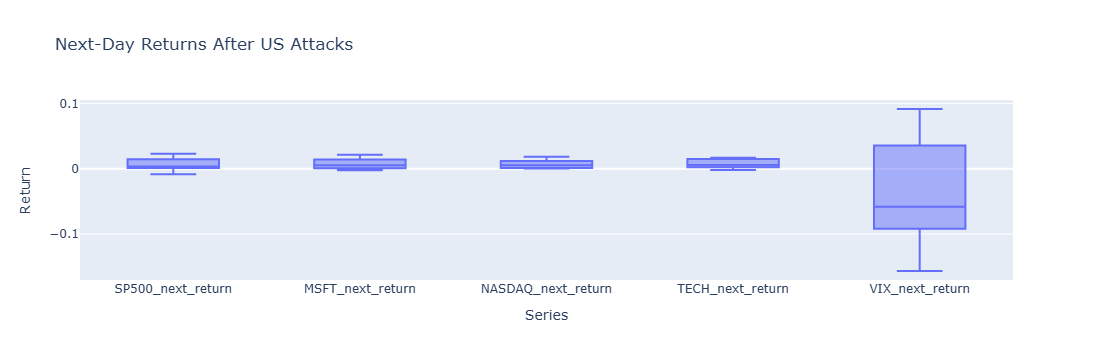

In [13]:
import plotly.express as px

# 1) List of your return columns
return_cols = [
    'SP500_next_return',
    'MSFT_next_return',
    'NASDAQ_next_return',
    'TECH_next_return',
    'VIX_next_return'
]

# 2) Melt to “long” form so each row is one observation
df_melt = df.melt(
    id_vars=['event','date','weekday','next_bd'],
    value_vars=return_cols,
    var_name='Series',
    value_name='Return'
)

# 3) Plot vertical boxes
fig = px.box(
    df_melt,
    x='Series',
    y='Return',
    title='Next-Day Returns After US Attacks'
)
fig.show()


In [14]:
# After spx history call, also grab volume:
spx_df = yf.Ticker("^GSPC").history(start=start, end=end, auto_adjust=True)[["Close","Volume"]]
spx_df = spx_df.tz_localize(None).sort_index()

# pct_change on Close as before
spx_ret = spx_df["Close"].pct_change()
df["SP500_return_next"] = spx_ret.reindex(df["next_bd"], method="bfill").values

# volume on next_bd
df["SP500_volume_next"] = spx_df["Volume"].reindex(df["next_bd"], method="bfill").values

print(df[["event","next_bd","SP500_return_next","SP500_volume_next"]])

                event    next_bd  SP500_return_next  SP500_volume_next
0        Desert Storm 1991-01-18           0.012989          226770000
1    Enduring Freedom 2001-10-08          -0.008344          979000000
2    Invasion of Iraq 2003-03-21           0.022977         1883710000
3  Libya Intervention 2011-03-21           0.014986         4223730000
4    Inherent Resolve 2014-08-11           0.002759         2784890000
5     Syria Airstrike 2017-04-10           0.000688         2792570000
6    Soleimani Strike 2020-01-06           0.003533         3702460000


In [15]:
# --- assume you already have:
#   spx_df with a 'Volume' column, indexed by date
#   df with 'next_bd' and 'SP500_volume_next' columns

# 1) Simple volume index (ratio to overall mean)
mean_vol = spx_df["Volume"].mean()
df["SP500_vol_index"] = df["SP500_volume_next"] / mean_vol

# 2) Z-score (how many σ above/below the mean)
std_vol = spx_df["Volume"].std()
df["SP500_vol_zscore"] = (
    df["SP500_volume_next"] - mean_vol
) / std_vol

# 3) (Optional) Rolling 30-day average index
roll30 = spx_df["Volume"].rolling(30).mean()
# look up the 30-day avg on each next_bd (backfill in case of holiday)
df["SP500_vol_30d_avg"] = roll30.reindex(df["next_bd"], method="bfill").values
df["SP500_vol_vs_30d"] = df["SP500_volume_next"] / df["SP500_vol_30d_avg"]

# Inspect all together
print(df[[
    "event","next_bd","SP500_volume_next",
    "SP500_vol_index","SP500_vol_zscore","SP500_vol_vs_30d"
]])


                event    next_bd  SP500_volume_next  SP500_vol_index  \
0        Desert Storm 1991-01-18          226770000         0.100272   
1    Enduring Freedom 2001-10-08          979000000         0.432888   
2    Invasion of Iraq 2003-03-21         1883710000         0.832927   
3  Libya Intervention 2011-03-21         4223730000         1.867621   
4    Inherent Resolve 2014-08-11         2784890000         1.231404   
5     Syria Airstrike 2017-04-10         2792570000         1.234800   
6    Soleimani Strike 2020-01-06         3702460000         1.637129   

   SP500_vol_zscore  SP500_vol_vs_30d  
0         -1.164367               NaN  
1         -0.733918          0.697893  
2         -0.216215          1.351233  
3          1.122816          1.251703  
4          0.299468          0.904734  
5          0.303862          0.795342  
6          0.824529          1.080006  


In [16]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay

# 1) Your events
events = [
    ("1991-01-17", "Desert Storm"),
    ("2001-10-07", "Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]
df = pd.DataFrame(events, columns=["date","event"])
df["date"]    = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.day_name()
df["next_bd"] = df["date"] + BDay(1)

# 2) Time window for fetching
start = df["date"].min() - pd.Timedelta(days=5)
end   = df["date"].max() + pd.Timedelta(days=5)

# 3) Define the 11 SPDR sector ETFs
sectors = {
    "InfoTech":               "XLK",
    "HealthCare":             "XLV",
    "Financials":             "XLF",
    "ConsDiscretionary":      "XLY",
    "CommServices":           "XLC",
    "Industrials":            "XLI",
    "ConsStaples":            "XLP",
    "Energy":                 "XLE",
    "Materials":              "XLB",
    "Utilities":              "XLU",
    "RealEstate":             "XLRE",
}

# 4) Helper to fetch pct-changes
def fetch_returns(tkr: str) -> pd.Series:
    s = (
        yf.Ticker(tkr)
          .history(start=start, end=end, auto_adjust=True)["Close"]
          .tz_localize(None)
          .sort_index()
    )
    return s.pct_change()

# 5) Loop through each sector and add its next-day return
for name, ticker in sectors.items():
    series = fetch_returns(ticker)
    df[f"{name}_next_return"] = (
        series
          .reindex(df["next_bd"], method="bfill")
          .values
    )

# 6) Inspect the first few rows
print(df[[
    "event","date","weekday","next_bd",
    *[f"{name}_next_return" for name in sectors]
]])


                event       date   weekday    next_bd  InfoTech_next_return  \
0        Desert Storm 1991-01-17  Thursday 1991-01-18                   NaN   
1    Enduring Freedom 2001-10-07    Sunday 2001-10-08              0.006773   
2    Invasion of Iraq 2003-03-20  Thursday 2003-03-21              0.015032   
3  Libya Intervention 2011-03-19  Saturday 2011-03-21              0.016867   
4    Inherent Resolve 2014-08-08    Friday 2014-08-11              0.004913   
5     Syria Airstrike 2017-04-07    Friday 2017-04-10             -0.001885   
6    Soleimani Strike 2020-01-03    Friday 2020-01-06              0.002382   

   HealthCare_next_return  Financials_next_return  \
0                     NaN                     NaN   
1               -0.007532               -0.022485   
2                0.025968                0.025356   
3                0.008445                0.004917   
4               -0.000496                0.000894   
5               -0.001882               -0.002551

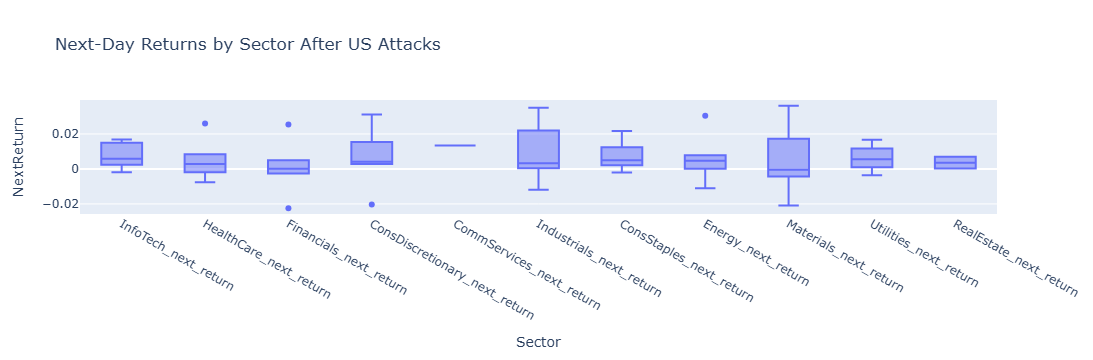

In [17]:
import plotly.express as px

# melt only the sector returns
sector_cols = [f"{name}_next_return" for name in sectors]
df_melt = df.melt(
    id_vars=["event","date","weekday","next_bd"],
    value_vars=sector_cols,
    var_name="Sector",
    value_name="NextReturn"
)

fig = px.box(
    df_melt,
    x="Sector",
    y="NextReturn",
    title="Next-Day Returns by Sector After US Attacks"
)
fig.show()


In [19]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay

# 1) Your events
events = [
    ("1991-01-17", "Desert Storm"),
    ("2001-10-07", "Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]
df = pd.DataFrame(events, columns=["date","event"])
df["date"]    = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.day_name()

# 2) Time window (pad on both ends for your longest horizon)
start = df["date"].min() - pd.Timedelta(days=10)
end   = df["date"].max() + pd.Timedelta(days=60)

# 3) Tickers to analyze
tickers = {
    "SP500":   "^GSPC",
    "MSFT":    "MSFT",
    "NASDAQ":  "^IXIC",
    "TECH":    "XLK",
    "VIX":     "^VIX",
}

# 4) Fetch each series and build one DataFrame
prices = {}
for name, sym in tickers.items():
    ser = (
        yf.Ticker(sym)
          .history(start=start, end=end, auto_adjust=True)["Close"]
          .tz_localize(None)
          .sort_index()
    )
    prices[name] = ser

prices_df = pd.DataFrame(prices).sort_index()
# prices_df.index is your trading‐day calendar; columns are SP500, MSFT, …

# 5) Locate each event’s “prev_bd” in that calendar
#    get_indexer(method="ffill") finds the last index ≤ event date
positions = prices_df.index.get_indexer(df["date"], method="ffill")
df["prev_bd"] = prices_df.index[positions]

# 6) Set up the horizons (# of trading‐day steps)
horizons = {
    "1D":  1,
    "1W":  5,
    "2W":  10,
    "1M":  20,
    "2M":  40,
}

# 7) Compute cumulative returns: price[t+days] / price[t] − 1
for name in prices_df.columns:
    series = prices_df[name]
    for label, days in horizons.items():
        col = f"{name}_cumret_{label}"
        df[col] = [
            (series.iloc[pos+days] / series.iloc[pos] - 1)
            if (pos + days) < len(series)
            else pd.NA
            for pos in positions
        ]

# 8) Your df now has:
#    event, date, weekday, prev_bd,
#    SP500_cumret_1D, SP500_cumret_1W, … , VIX_cumret_2M
df.head()


,date,event,weekday,prev_bd,SP500_cumret_1D,SP500_cumret_1W,SP500_cumret_2W,SP500_cumret_1M,SP500_cumret_2M,MSFT_cumret_1D,...,TECH_cumret_1D,TECH_cumret_1W,TECH_cumret_2W,TECH_cumret_1M,TECH_cumret_2M,VIX_cumret_1D,VIX_cumret_1W,VIX_cumret_2W,VIX_cumret_1M,VIX_cumret_2M
0,1991-01-17,Desert Storm,Thursday,1991-01-17,0.012989,0.020764,0.048663,0.110528,0.139098,0.014881,...,NaN,NaN,NaN,NaN,NaN,-0.075046,-0.167213,-0.238251,-0.217486,-0.457195
1,2001-10-07,Enduring Freedom,Sunday,2001-10-05,-0.008344,0.018920,0.001960,0.014766,0.054621,0.005545,...,0.006773,0.060474,0.027092,0.070150,0.170295,0.051812,0.056304,0.021563,-0.080264,-0.228212
2,2003-03-20,Invasion of Iraq,Thursday,2003-03-20,0.022977,-0.008165,0.000891,0.020453,0.078374,0.012191,...,0.015032,-0.026798,-0.016340,-0.005883,0.078432,-0.058147,-0.081472,-0.073259,-0.293693,-0.395532
3,2011-03-19,Libya Intervention,Saturday,2011-03-18,0.014986,0.027040,0.041588,0.031637,0.03929,0.021370,...,0.016868,0.039358,0.044579,0.033735,0.04739,-0.156710,-0.267185,-0.288052,-0.373159,-0.253683
4,2014-08-08,Inherent Resolve,Friday,2014-08-08,0.002759,0.012151,0.029411,0.036214,0.017203,0.000000,...,0.004913,0.016033,0.037238,0.043445,0.028198,-0.097654,-0.166138,-0.272670,-0.197210,-0.019658


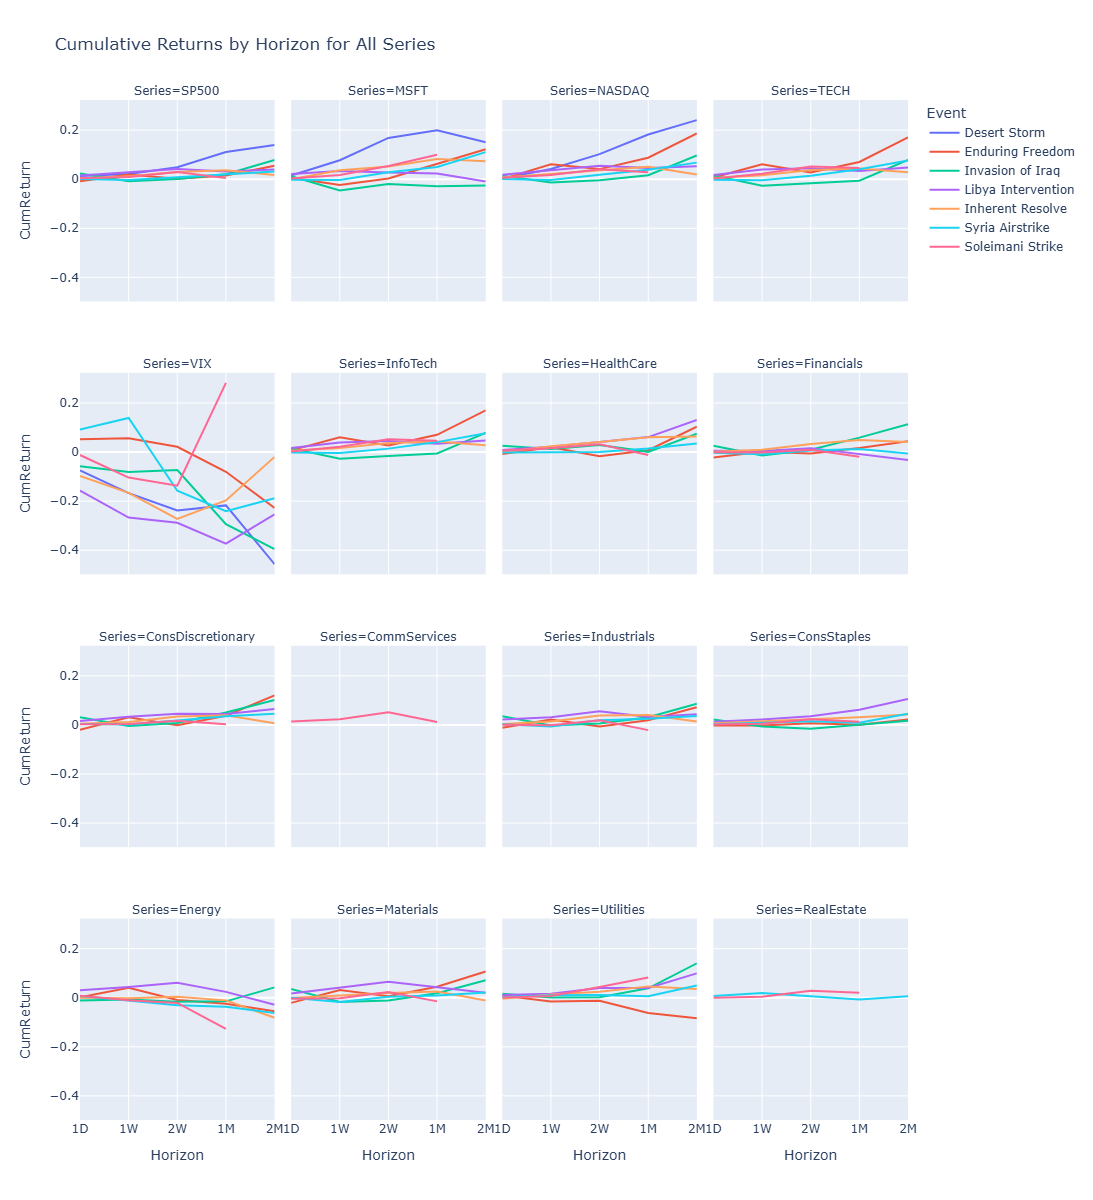

In [27]:
import plotly.express as px

# 1) Your series names and horizons
series   = list(tickers.keys())           # e.g. ["SP500","MSFT",…,"RealEstate","VIX"]
horizons = ["1D","1W","2W","1M","2M"]     # same labels you used when building df

# 2) Build the list of all cum‐return columns
cum_cols = [f"{s}_cumret_{h}" for s in series for h in horizons]

# 3) Melt into long form
df_long = df.melt(
    id_vars=["event"],
    value_vars=cum_cols,
    var_name="Series_Horizon",
    value_name="CumReturn"
)

# 4) Split "Series_Horizon" into two separate columns
df_long[["Series","Horizon"]] = df_long["Series_Horizon"]\
    .str.split("_cumret_", expand=True)

# 5) Plot one facet per Series, wrapping into rows of 4
fig = px.line(
    df_long,
    x="Horizon",
    y="CumReturn",
    color="event",
    facet_col="Series",
    facet_col_wrap=4,
    category_orders={"Horizon": horizons},
    title="Cumulative Returns by Horizon for All Series"
)

fig.update_layout(
    height=1200,
    legend=dict(title="Event")
)
fig.show()


In [26]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import BDay

# 1) Your events
events = [
    ("1991-01-17", "Desert Storm"),
    ("2001-10-07", "Enduring Freedom"),
    ("2003-03-20", "Invasion of Iraq"),
    ("2011-03-19", "Libya Intervention"),
    ("2014-08-08", "Inherent Resolve"),
    ("2017-04-07", "Syria Airstrike"),
    ("2020-01-03", "Soleimani Strike"),
]
df = pd.DataFrame(events, columns=["date","event"])
df["date"]    = pd.to_datetime(df["date"])
df["weekday"] = df["date"].dt.day_name()

# 2) Time window
start = df["date"].min() - pd.Timedelta(days=10)
end   = df["date"].max() + pd.Timedelta(days=60)

# 3) Define **all** tickers: SP500, stocks, sectors, VIX
tickers = {
    "SP500":            "^GSPC",
    "MSFT":             "MSFT",
    "NASDAQ":           "^IXIC",
    "TECH":             "XLK",
    "VIX":              "^VIX",
    # 11 SPDR sector ETFs:
    "InfoTech":         "XLK",
    "HealthCare":       "XLV",
    "Financials":       "XLF",
    "ConsDiscretionary":"XLY",
    "CommServices":     "XLC",
    "Industrials":      "XLI",
    "ConsStaples":      "XLP",
    "Energy":           "XLE",
    "Materials":        "XLB",
    "Utilities":        "XLU",
    "RealEstate":       "XLRE",
}

# 4) Fetch them all into one prices_df
prices = {}
for name, sym in tickers.items():
    s = (
        yf.Ticker(sym)
          .history(start=start, end=end, auto_adjust=True)["Close"]
          .tz_localize(None)
          .sort_index()
    )
    prices[name] = s

prices_df = pd.DataFrame(prices).sort_index()

# 5) Locate each event’s prev_bd
positions = prices_df.index.get_indexer(df["date"], method="ffill")
df["prev_bd"] = prices_df.index[positions]

# 6) Horizons
horizons = {"1D":1, "1W":5, "2W":10, "1M":20, "2M":40}

# 7) Compute cum-returns for every ticker × horizon
for name in prices_df.columns:
    series = prices_df[name]
    for label, days in horizons.items():
        col = f"{name}_cumret_{label}"
        df[col] = [
            (series.iloc[pos+days] / series.iloc[pos] - 1)
            if (pos + days) < len(series)
            else pd.NA
            for pos in positions
        ]

# 8) Inspect
df.head()


,date,event,weekday,prev_bd,SP500_cumret_1D,SP500_cumret_1W,SP500_cumret_2W,SP500_cumret_1M,SP500_cumret_2M,MSFT_cumret_1D,...,Utilities_cumret_1D,Utilities_cumret_1W,Utilities_cumret_2W,Utilities_cumret_1M,Utilities_cumret_2M,RealEstate_cumret_1D,RealEstate_cumret_1W,RealEstate_cumret_2W,RealEstate_cumret_1M,RealEstate_cumret_2M
0,1991-01-17,Desert Storm,Thursday,1991-01-17,0.012989,0.020764,0.048663,0.110528,0.139098,0.014881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-10-07,Enduring Freedom,Sunday,2001-10-05,-0.008344,0.018920,0.001960,0.014766,0.054621,0.005545,...,0.009361,-0.015045,-0.012704,-0.061852,-0.08325,NaN,NaN,NaN,NaN,NaN
2,2003-03-20,Invasion of Iraq,Thursday,2003-03-20,0.022977,-0.008165,0.000891,0.020453,0.078374,0.012191,...,0.016655,0.001465,0.002007,0.038355,0.140346,NaN,NaN,NaN,NaN,NaN
3,2011-03-19,Libya Intervention,Saturday,2011-03-18,0.014986,0.027040,0.041588,0.031637,0.03929,0.021370,...,0.011658,0.016516,0.040156,0.039507,0.099417,NaN,NaN,NaN,NaN,NaN
4,2014-08-08,Inherent Resolve,Friday,2014-08-08,0.002759,0.012151,0.029411,0.036214,0.017203,0.000000,...,-0.003619,0.012789,0.024373,0.046332,0.035797,NaN,NaN,NaN,NaN,NaN


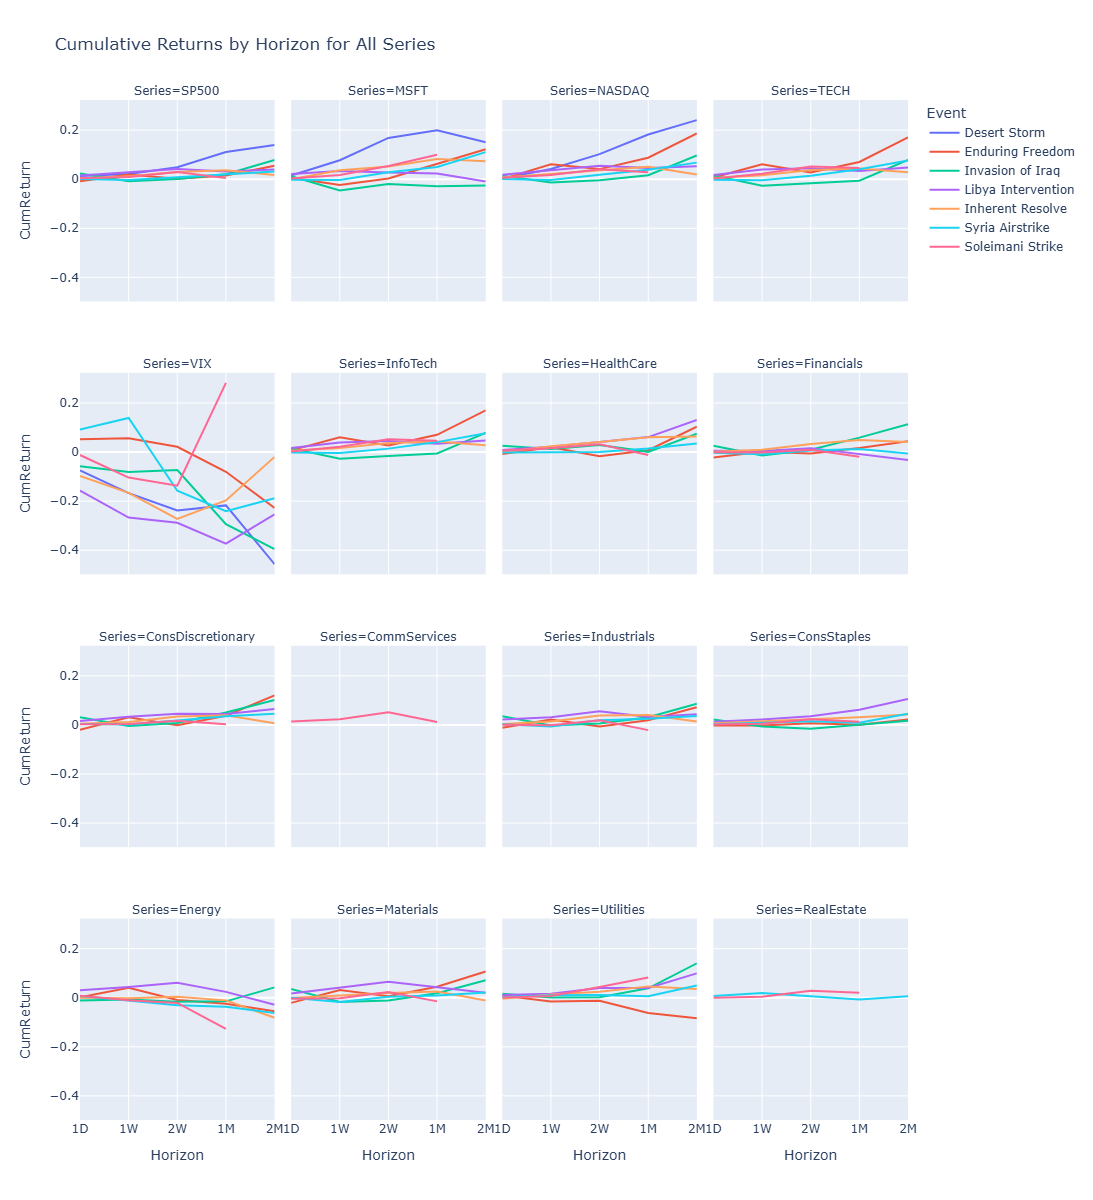

In [28]:
import plotly.express as px

# 1) Your series names and horizons
series   = list(tickers.keys())           # e.g. ["SP500","MSFT",…,"RealEstate","VIX"]
horizons = ["1D","1W","2W","1M","2M"]     # same labels you used when building df

# 2) Build the list of all cum‐return columns
cum_cols = [f"{s}_cumret_{h}" for s in series for h in horizons]

# 3) Melt into long form
df_long = df.melt(
    id_vars=["event"],
    value_vars=cum_cols,
    var_name="Series_Horizon",
    value_name="CumReturn"
)

# 4) Split "Series_Horizon" into two separate columns
df_long[["Series","Horizon"]] = df_long["Series_Horizon"]\
    .str.split("_cumret_", expand=True)

# 5) Plot one facet per Series, wrapping into rows of 4
fig = px.line(
    df_long,
    x="Horizon",
    y="CumReturn",
    color="event",
    facet_col="Series",
    facet_col_wrap=4,
    category_orders={"Horizon": horizons},
    title="Cumulative Returns by Horizon for All Series"
)

fig.update_layout(
    height=1200,
    legend=dict(title="Event")
)
fig.show()


In [29]:
import pandas as pd

# 1) Identify all your cum-return columns
cum_cols = [c for c in df.columns if "_cumret_" in c]

# 2) Melt into long form
df_long = df.melt(
    value_vars=cum_cols,
    var_name="Series_Horizon",
    value_name="CumReturn"
)

# 3) Split Series_Horizon into two fields
df_long[["Series","Horizon"]] = (
    df_long["Series_Horizon"]
      .str.split("_cumret_", expand=True)
)

# 4) Group by Series & Horizon and compute stats
stats = (
    df_long
      .groupby(["Series","Horizon"])["CumReturn"]
      .agg(count="count", mean="mean", median="median")
)

# 5) (Optional) Pivot to wide format
mean_table   = stats["mean"].unstack("Horizon")
median_table = stats["median"].unstack("Horizon")

print("=== Mean cumulative returns ===")
print(mean_table.round(4))
print("\n=== Median cumulative returns ===")
print(median_table.round(4))


=== Mean cumulative returns ===
Horizon                  1D        1M        1W        2M        2W
Series                                                             
CommServices       0.013356  0.011872  0.023186       NaN  0.051382
ConsDiscretionary  0.006208  0.034953  0.012935  0.067697   0.02015
ConsStaples        0.007376  0.019485  0.006953  0.046694  0.014337
Energy              0.00609 -0.031565  0.008828 -0.037041 -0.001986
Financials         0.000913  0.018282 -0.001737  0.032468  0.011394
HealthCare         0.005121  0.022075  0.015143  0.081438  0.020922
Industrials        0.008663  0.020966  0.009657  0.050413  0.021689
InfoTech           0.007347  0.037999  0.017813  0.080204   0.02638
MSFT               0.007755  0.069854  0.013149  0.070215  0.044597
Materials          0.004544     0.021  0.007491  0.041921  0.018007
NASDAQ             0.006946   0.06409  0.023173  0.110571  0.041613
RealEstate         0.003587  0.006229   0.01156  0.005971  0.017141
SP500           

C:\Users\pkeen\PycharmProjects\FlaskAgentSentiment\.venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning:

Mean of empty slice



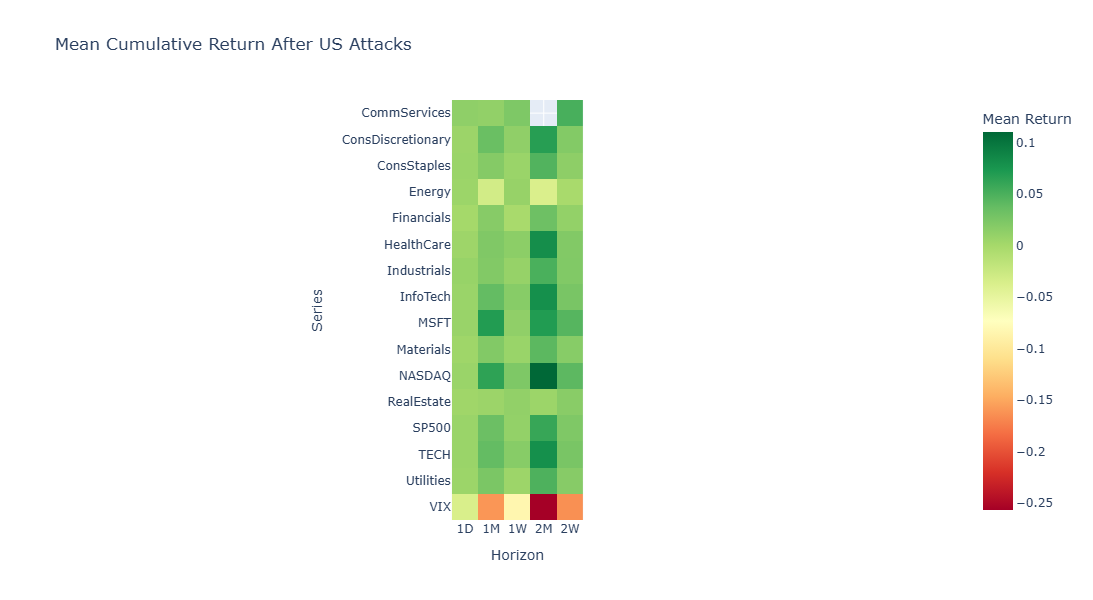

In [30]:
import plotly.express as px

# 1) Suppose mean_table is your pivoted DataFrame of mean returns:
#       index = Series (SP500, NASDAQ, InfoTech, …, VIX)
#       columns = Horizon (1D, 1W, 2W, 1M, 2M)
#    If you followed the earlier code, you’ll have

#     mean_table = stats["mean"].unstack("Horizon")

# 2) Draw it as a diverging‐colormap heatmap
fig = px.imshow(
    mean_table,
    x=mean_table.columns,
    y=mean_table.index,
    color_continuous_scale="RdYlGn",
    labels=dict(x="Horizon", y="Series", color="Mean Return"),
    title="Mean Cumulative Return After US Attacks"
)

# 3) Tweak layout to fit
fig.update_layout(
    xaxis_side="bottom",
    height=600,
)
fig.show()


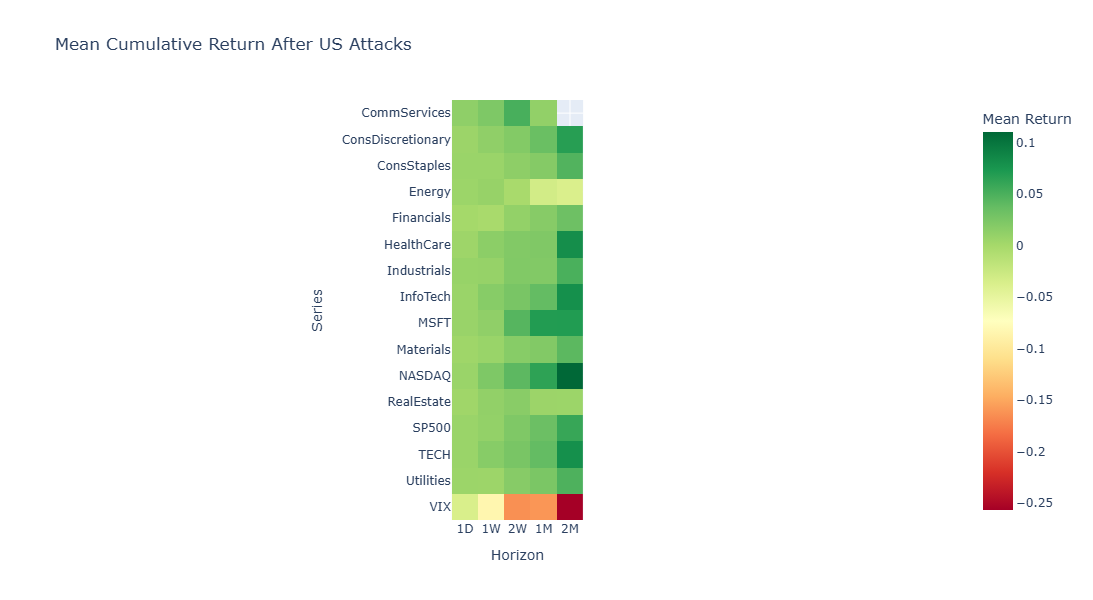

In [32]:
### import plotly.express as px

# 1) Define the exact column order you want
horizons = ["1D", "1W", "2W", "1M", "2M"]

# 2) Reorder your mean_table
mean_table = mean_table[horizons]

# 3) Plot with that ordering
fig = px.imshow(
    mean_table,
    x=mean_table.columns,
    y=mean_table.index,
    color_continuous_scale="RdYlGn",
    labels=dict(x="Horizon", y="Series", color="Mean Return"),
    title="Mean Cumulative Return After US Attacks"
)
fig.update_layout(xaxis_side="bottom", height=600)
fig.show()
